# Bike Sharing Assignment - BoomBikes

# Problem statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    Which variables are significant in predicting the demand for shared bikes.
    How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

# Analysis Overview

### Steps

1. Step 1: Read and Understand Data
2. Step 2: Data Visualisation
3. Step 3: Data Preparation for Linear Regression
4. Step 4: Data Split (Train and Test)
5. Step 5: Build Models (Linear Regression) - Multiple Iterations (Model 1 to Model N)
6. Step 6: Residual Analysis
7. Step 7: Prediction of values on test dataset
8. Step 8: Model Evaluation
9. Step 9: Conclusion
10. Step 10: Recommendation

 ### Import Libraries

In [1]:
# Generic Libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
import datetime
from scipy.stats import pearsonr

#Warnings

import warnings
warnings.filterwarnings('ignore')

# Modeling Libraries - StatsModel, Scikit Learn etc.

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# STEP1: Read and Understand Data

In [2]:
# Load Input file
boom_bikes = pd.read_csv('day.csv')
boom_bikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
# See the data types and missing values

boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
boom_bikes.shape

(730, 16)

In [5]:
boom_bikes.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [6]:
boom_bikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [7]:
# Re-confirm null values - quantitatively

boom_bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

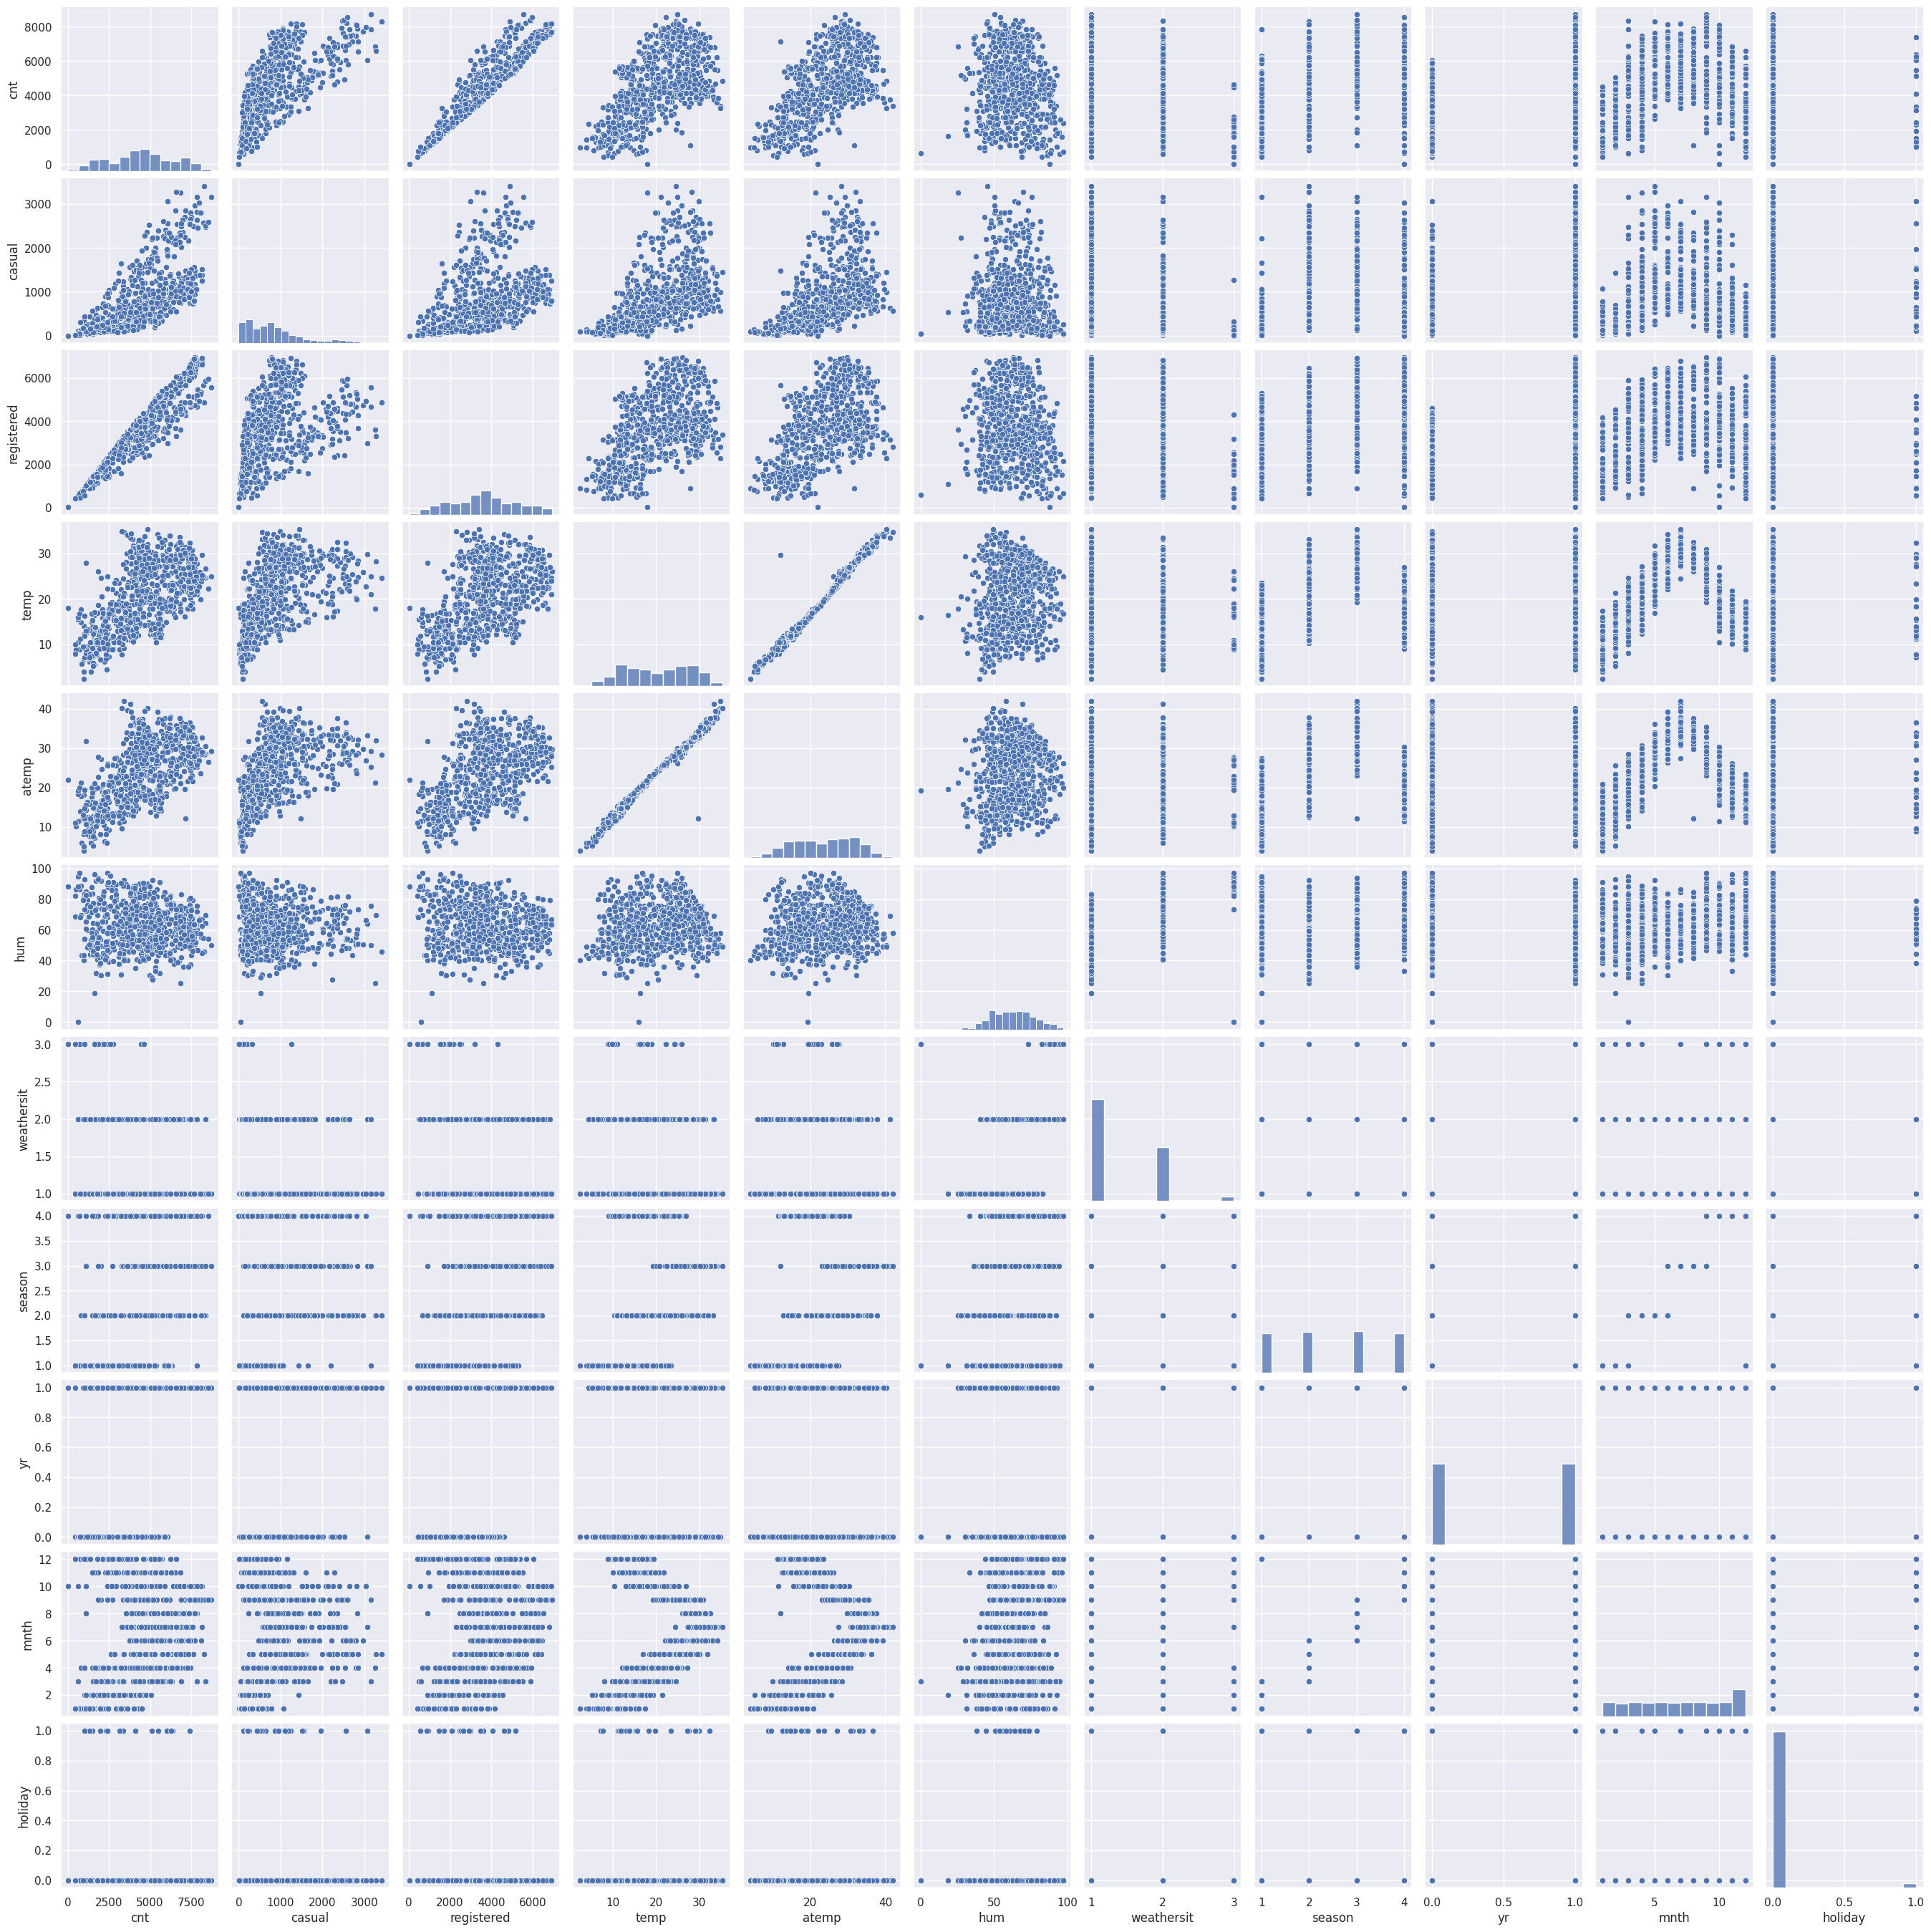

In [8]:
# Visualise data for better understanding of the data.

sns.pairplot(boom_bikes, vars=["cnt", "casual", "registered", "temp", "atemp", "hum", "weathersit", "season", "yr", "mnth", "holiday"])
plt.show()


```
High level understanding from initial analysis:
1. Total bike rental (cnt) has strong relationship with temp and atemp. Any one variable can be kept.
2. Total bike rental (cnt) has strong relationship with casual and registered users.
3. Total bike rental (cnt) has relationship with weather, month, year and holiday. More analysis required.
```



### Improve data readability

In [9]:
# weekday column (feature) : Convert to categorical values
boom_bikes.weekday.replace({0:'Sun',
                            1:'Mon',
                            2:'Tue',
                            3:'Wed',
                            4:'Thu',
                            5:'Fri',
                            6:'Sat'},
                                inplace=True)

In [10]:
# mnth (month) column (feature) : Convert to catagorical values

boom_bikes.mnth.replace({1:'JAN', 2:'FEB', 3:'MAR',
                         4:'APR', 5:'MAY', 6:'JUN',
                         7:'JUL', 8:'AUG', 9:'SEP',
                        10:'OCT', 11:'NOV', 12:'DEC'},
                            inplace=True)

In [11]:
# weathersit column (feature): Convert to catagorical values

boom_bikes.weathersit.replace({1:'Clear',
                               2:'Mist & Cloudy',
                               3:'Light Snow & Rain',
                               4:'Heavy Snow & Rain'},
                              inplace=True)

In [12]:
# season column (feature): Convert to categorical values

boom_bikes.season.replace({1:'Spring',
                           2:'Summer',
                           3:'Fall',
                           4:'Winter'},
                                inplace=True)

In [13]:
boom_bikes.head()

instant      dteday  season  yr mnth  holiday weekday  workingday  \
0        1  01-01-2018  Spring   0  JAN        0     Sat           0   
1        2  02-01-2018  Spring   0  JAN        0     Sun           0   
2        3  03-01-2018  Spring   0  JAN        0     Mon           1   
3        4  04-01-2018  Spring   0  JAN        0     Tue           1   
4        5  05-01-2018  Spring   0  JAN        0     Wed           1   

      weathersit       temp     atemp      hum  windspeed  casual  registered  \
0  Mist & Cloudy  14.110847  18.18125  80.5833  10.749882     331         654   
1  Mist & Cloudy  14.902598  17.68695  69.6087  16.652113     131         670   
2          Clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3          Clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4          Clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

#### Drop Columns that are not affecting target variable

In [14]:
# Dropping the below columns
# 1. column instant : it has no effect on target column. This is just an index column
# 2. casual and registered columns: these are part of cnt (target variable)
# 3. atemp columns: this is correlated

boom_bikes.drop(['instant',
                 'casual',
                 'registered',
                 'atemp'],
                    axis=1, inplace=True)

# STEP2: Data Visualization

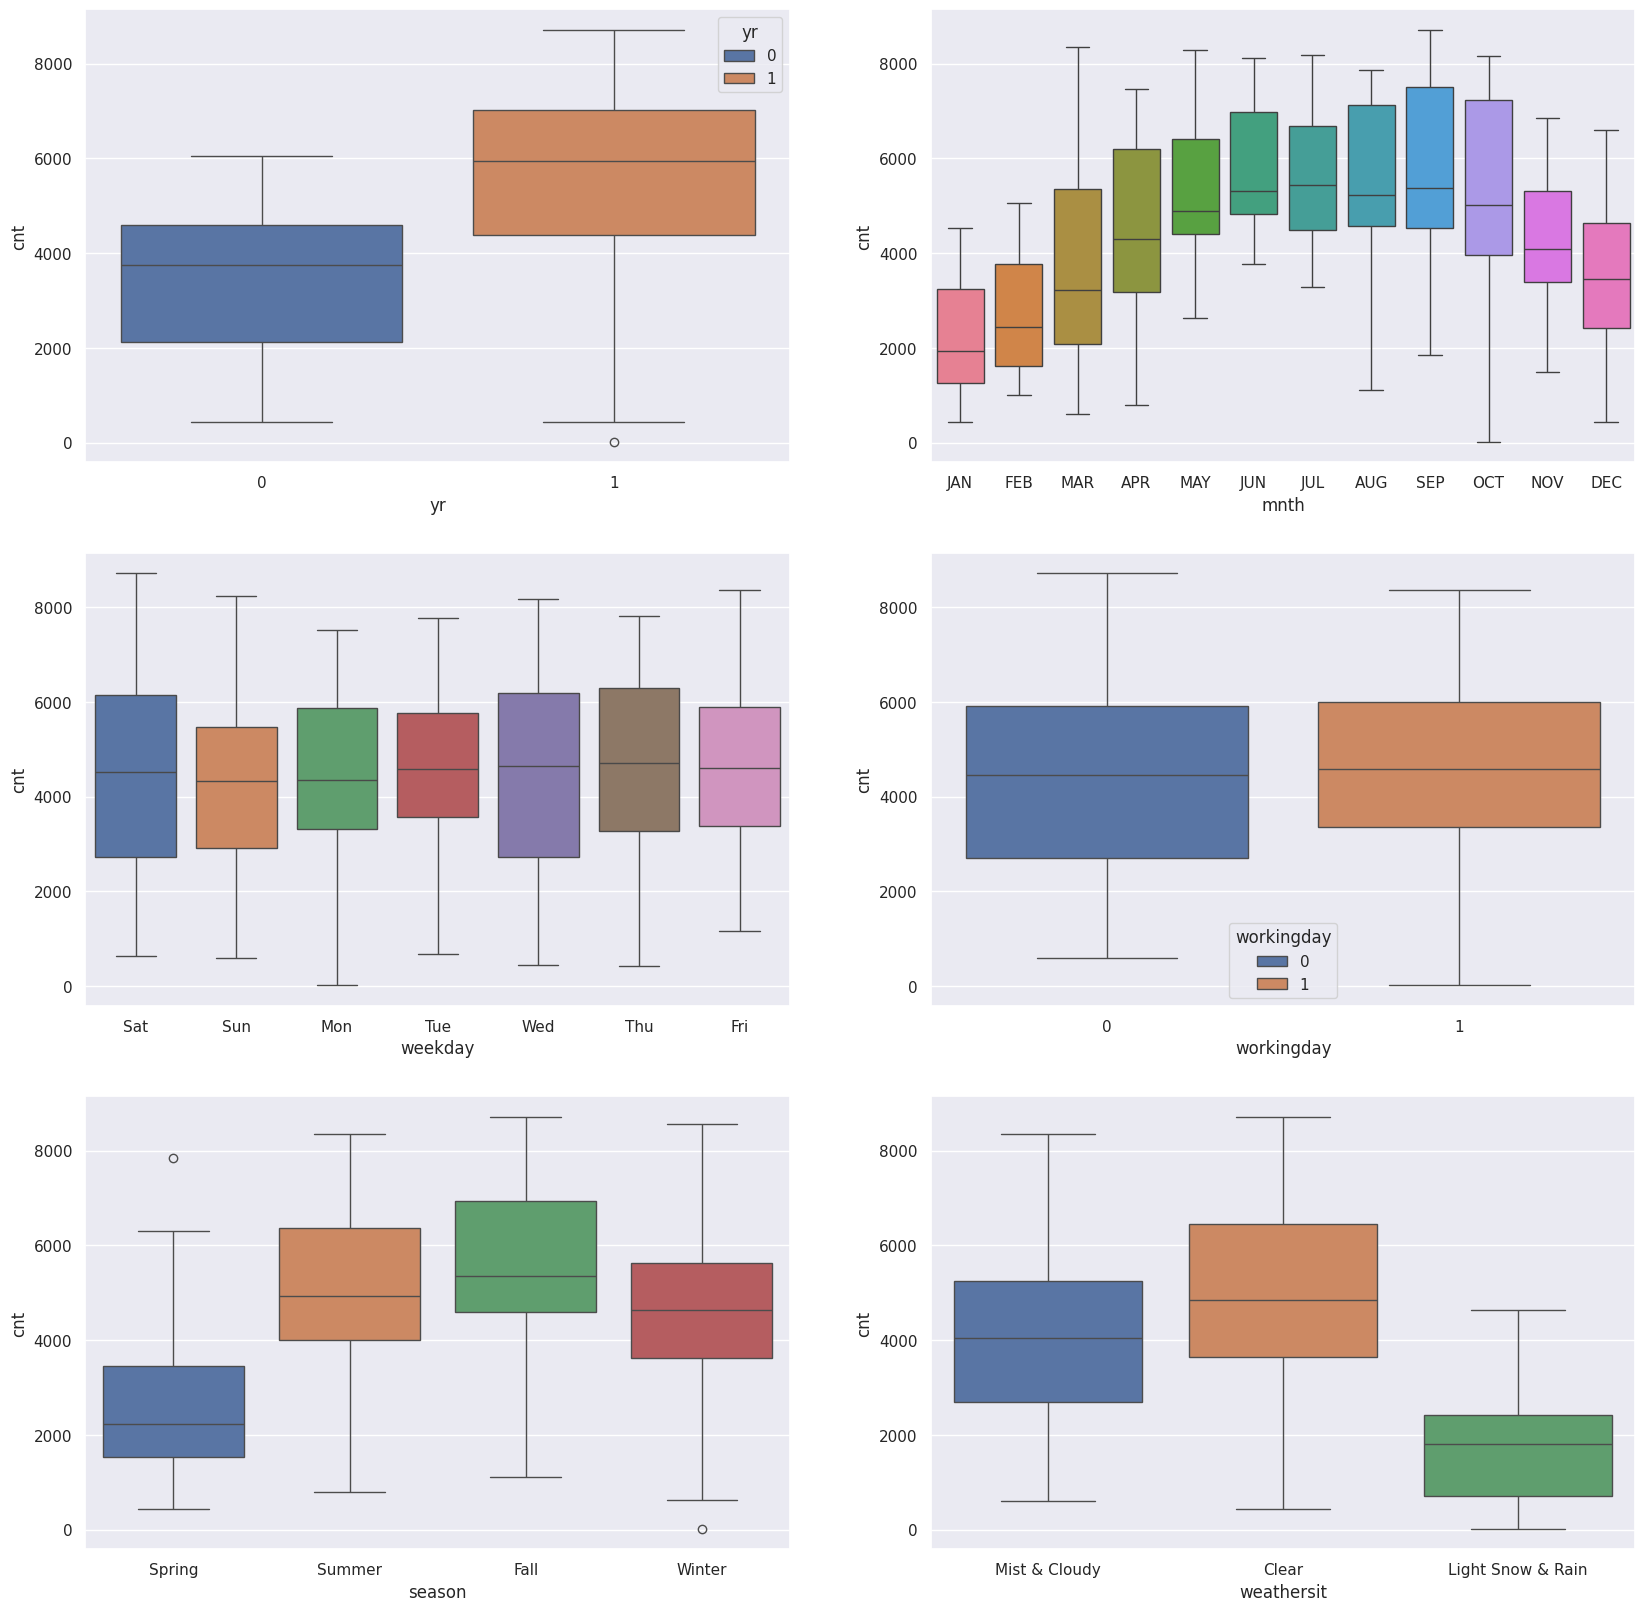

In [15]:
# Visualise the categorical columns for anlaysis
# Box Plot to visually analyse 25%, 50%, 75% and range

plt.figure(figsize=(20, 20))

plt.subplot(3,2,1)
sns.boxplot(x = 'yr', y = 'cnt', hue = 'yr', data = boom_bikes)

plt.subplot(3,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'mnth', data = boom_bikes)

plt.subplot(3,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'weekday', data = boom_bikes)

plt.subplot(3,2,4)
sns.boxplot(x = 'workingday', y = 'cnt', hue = 'workingday', data = boom_bikes)

plt.subplot(3,2,5)
sns.boxplot(x = 'season', y = 'cnt', hue = 'season', data = boom_bikes)

plt.subplot(3,2,6)
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'weathersit', data = boom_bikes)


plt.show()

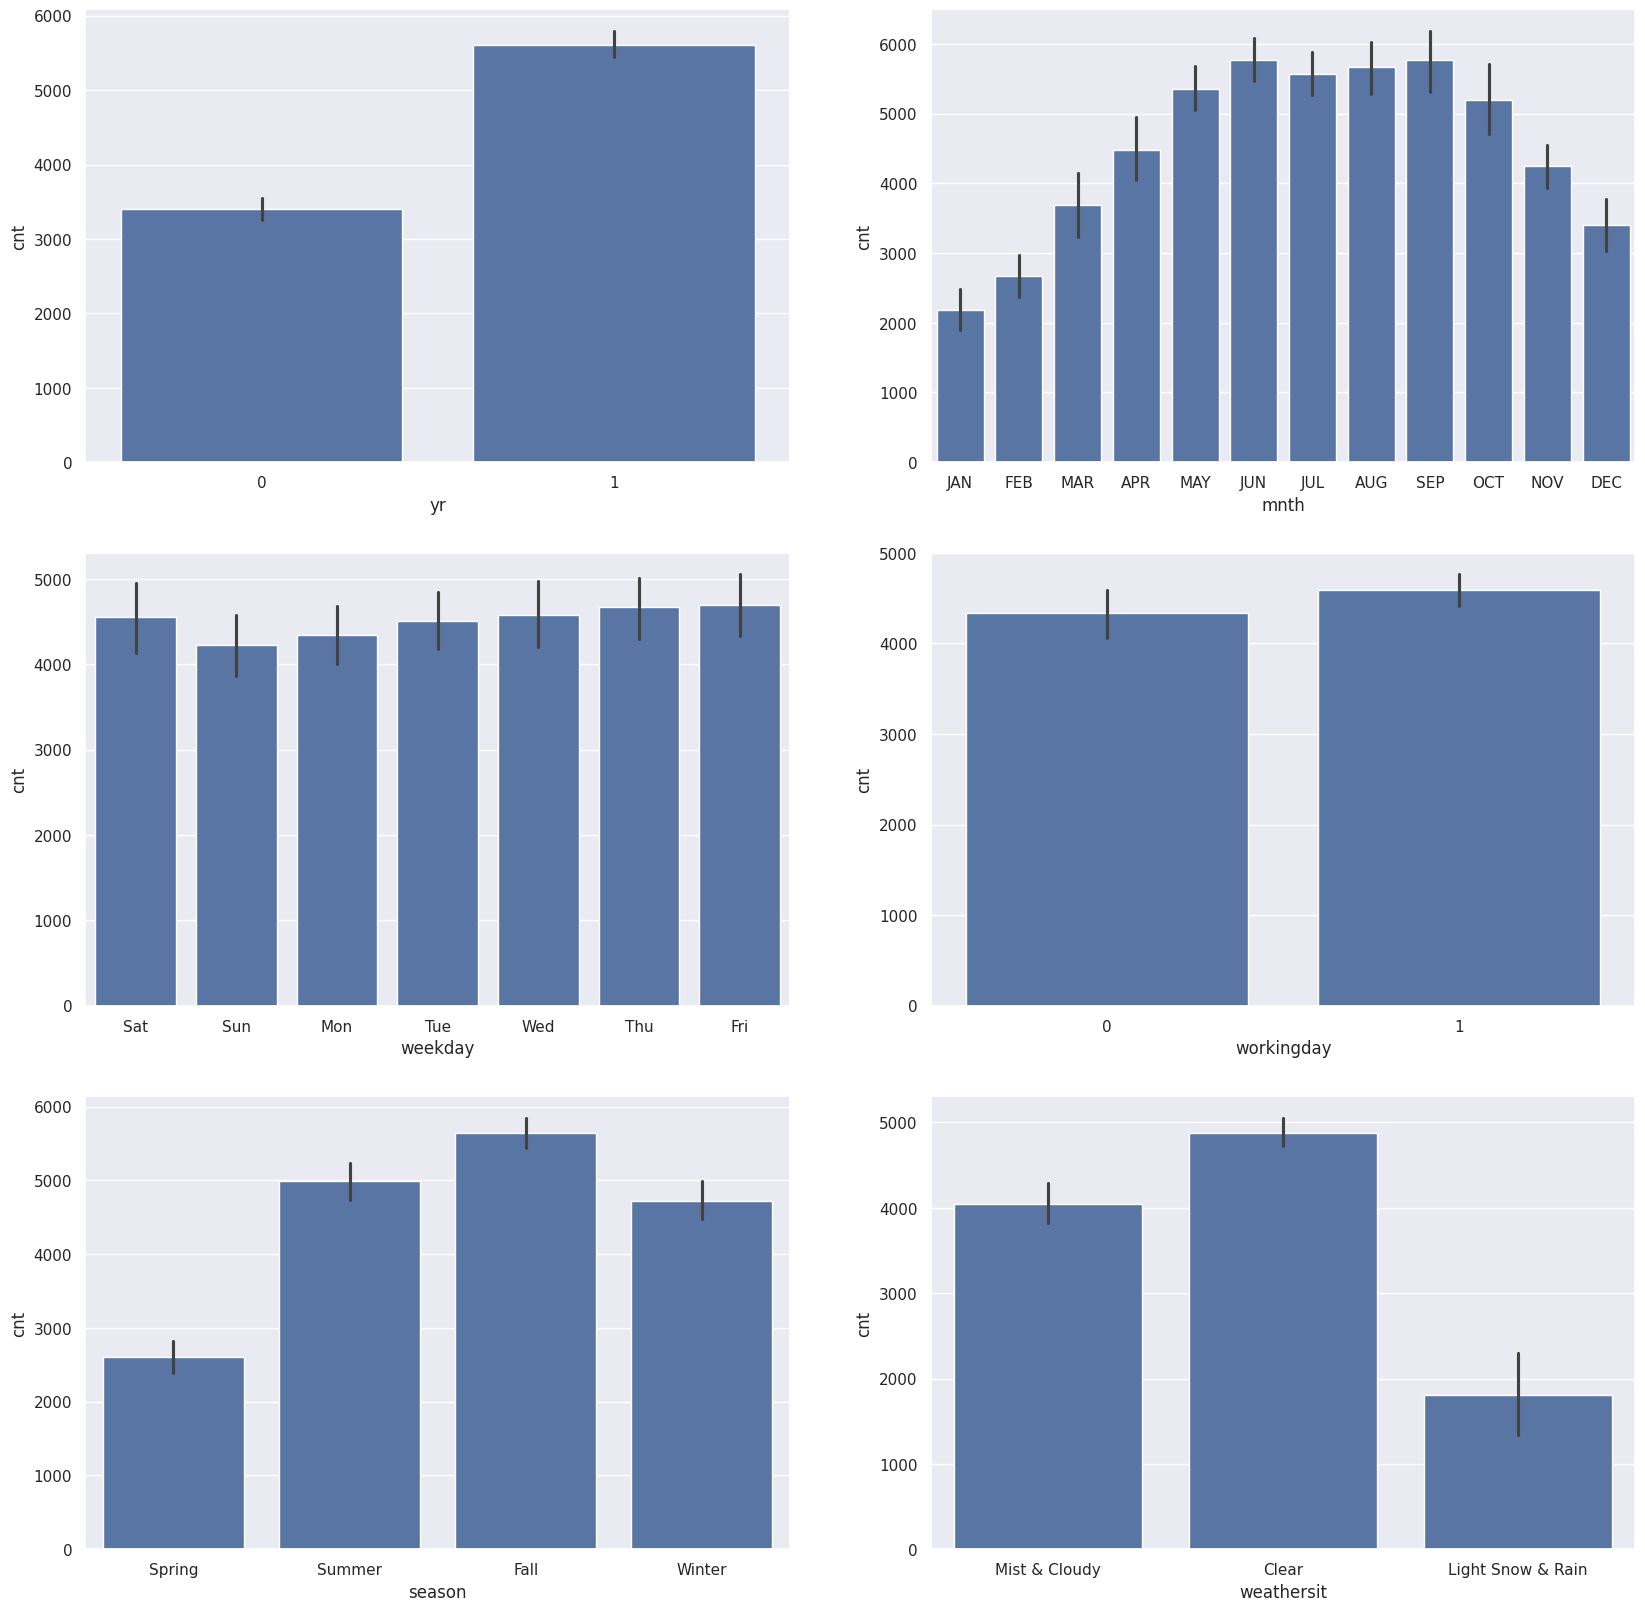

In [16]:
# Visualise the categorical columns for anlaysis
# Bar Plot to visually analyse absolute values

plt.figure(figsize=(20, 20))

plt.subplot(3,2,1)
sns.barplot(x = 'yr', y = 'cnt', data = boom_bikes)

plt.subplot(3,2,2)
sns.barplot(x = 'mnth', y = 'cnt', data = boom_bikes)

plt.subplot(3,2,3)
sns.barplot(x = 'weekday', y = 'cnt', data = boom_bikes)

plt.subplot(3,2,4)
sns.barplot(x = 'workingday', y = 'cnt', data = boom_bikes)

plt.subplot(3,2,5)
sns.barplot(x = 'season', y = 'cnt', data = boom_bikes)

plt.subplot(3,2,6)
sns.barplot(x = 'weathersit', y = 'cnt', data = boom_bikes)


plt.show()

```
High level understanding & conclusion of data visualisation:

1. Year 2019 has more rental than year 2018.
2. Summer and Fall seasons have highest rentals, slowly falling in winter.
3. Spring season has lowest rentals.
4. All weekdays have nearly equal mean rental. (on a broader view)
5. Light snow and rain reduces the bike rentals
6. Clear sky increases the rental demand.
```


In [17]:
boom_bikes.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.683562   20.319259   62.765175   12.763620   
std      0.500343    0.167266    0.465405    7.506729   14.237589    5.195841   
min      0.000000    0.000000    0.000000    2.424346    0.000000    1.500244   
25%      0.000000    0.000000    0.000000   13.811885   52.000000    9.041650   
50%      0.500000    0.000000    1.000000   20.465826   62.625000   12.125325   
75%      1.000000    0.000000    1.000000   26.880615   72.989575   15.625589   
max      1.000000    1.000000    1.000000   35.328347   97.250000   34.000021   

               cnt  
count   730.000000  
mean   4508.006849  
std    1936.011647  
min      22.000000  
25%    3169.750000  
50%    4548.500000  
75%    5966.000000  
max    8714.000000

In [18]:
# Dropping the below columns
# 1. dteday - as it does not make sense with monthly, weekday, seasonal data available

boom_bikes.drop(['dteday'],
                    axis=1, inplace=True)

In [19]:
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


## Visualising Numeric Variables : Using a pairplot

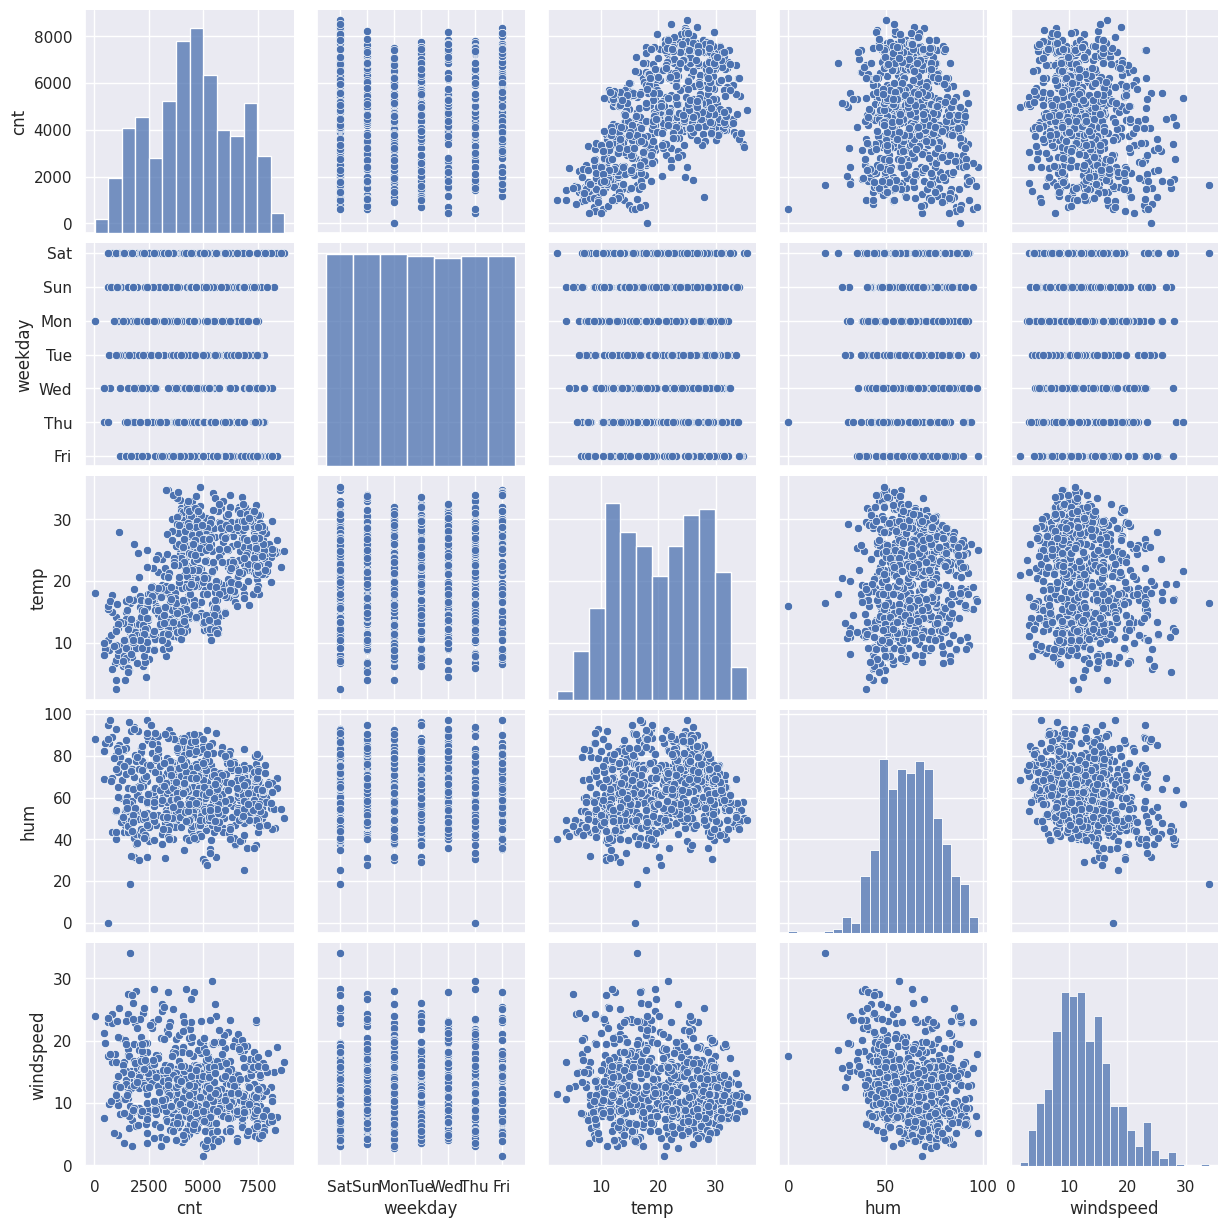

In [20]:
sns.pairplot(data=boom_bikes, vars=["cnt", "weekday", "temp", "hum","windspeed"])
plt.show()

## plotting  to check for linear relation between target variable and predictive numerical variables

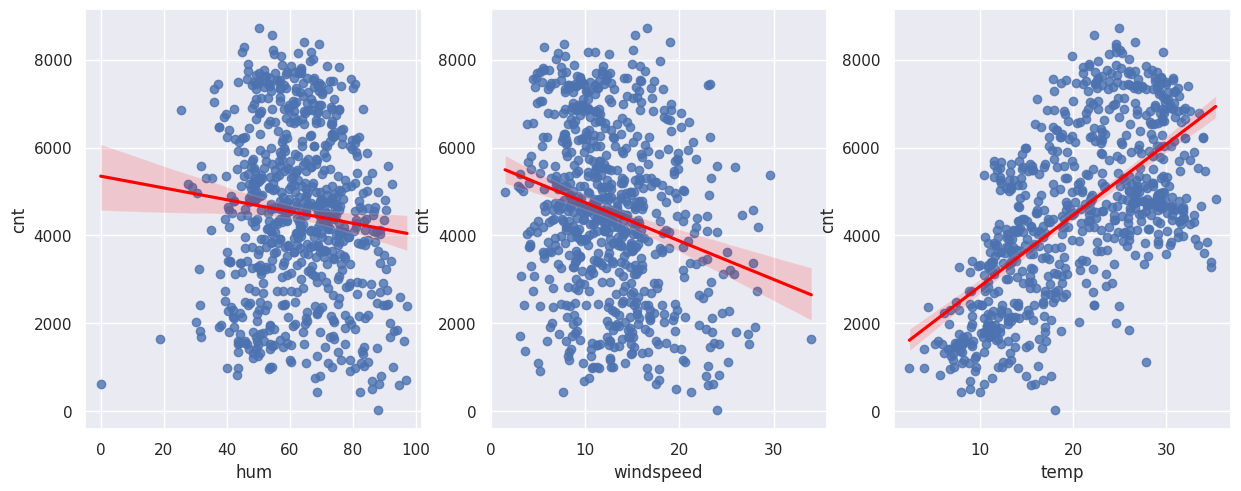

In [21]:
#plotting for temp , hum , windspeed
plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.regplot(x = 'hum', y = 'cnt', data = boom_bikes,line_kws={"color": "red"})
plt.subplot(2,4,2)
sns.regplot(x = 'windspeed', y = 'cnt', data = boom_bikes,line_kws={"color": "red"})
plt.subplot(2,4,3)
sns.regplot(x = 'temp', y = 'cnt', data = boom_bikes,line_kws={"color": "red"})
plt.show()

<Axes: xlabel='holiday', ylabel='cnt'>

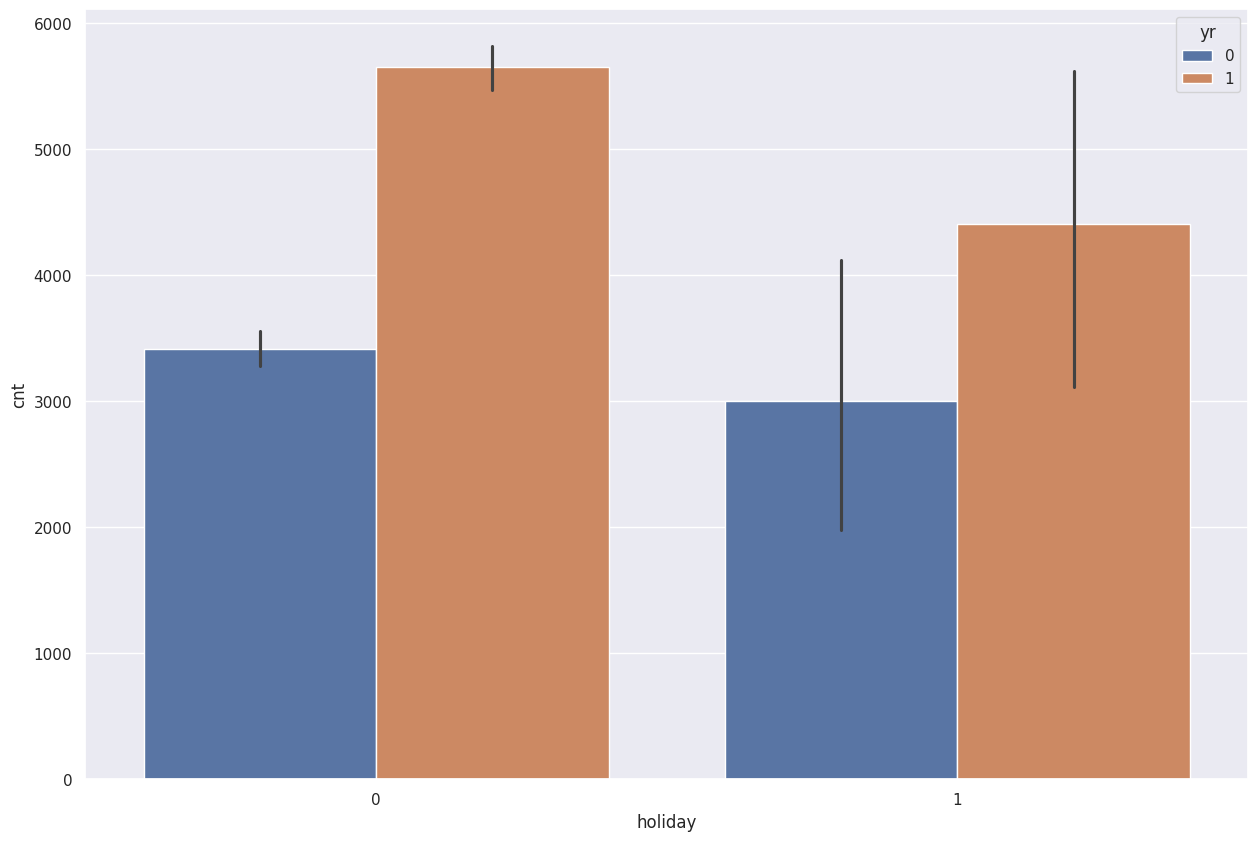

In [22]:
#plotting for yr, working day , holiday
sns.barplot(data=boom_bikes, x="holiday", y="cnt" ,hue="yr")

<Axes: xlabel='workingday', ylabel='cnt'>

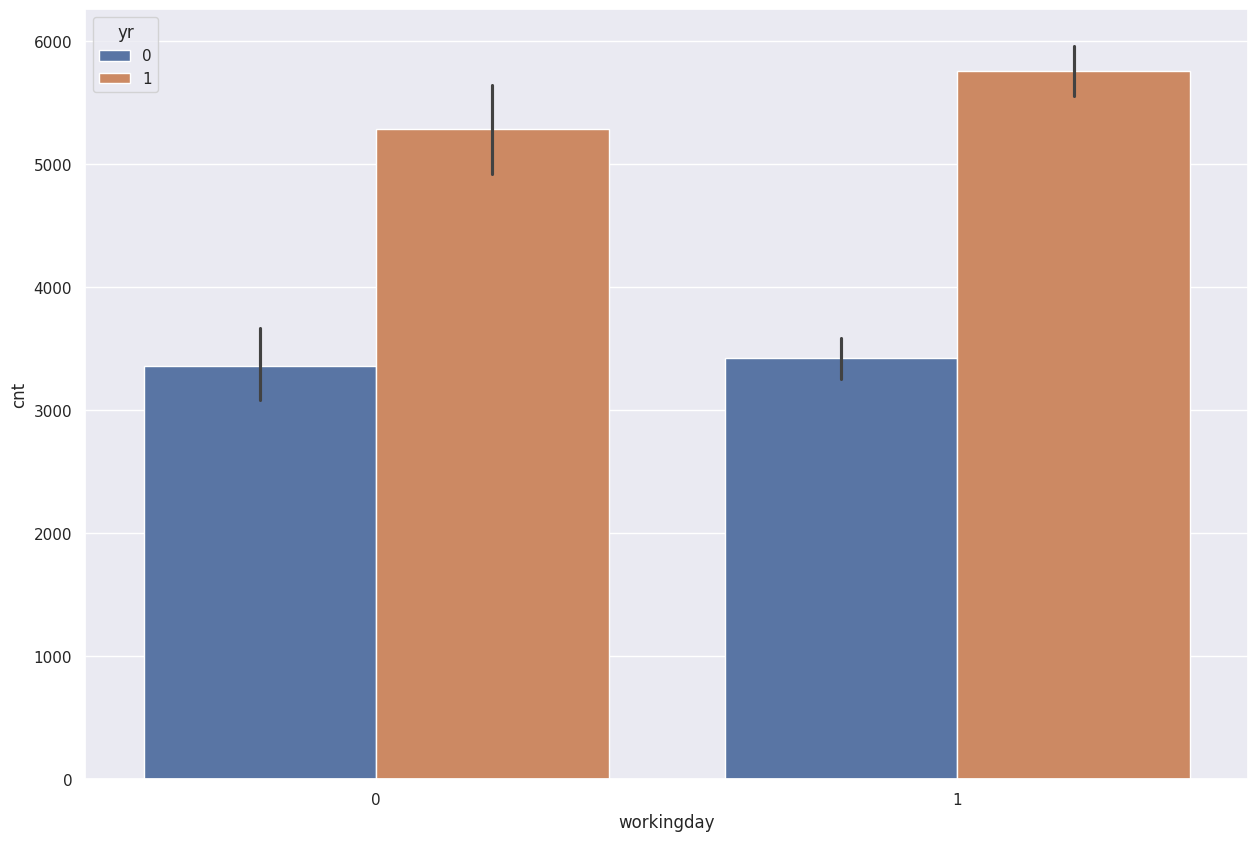

In [23]:
sns.barplot(data=boom_bikes, x='workingday', y='cnt' ,hue='yr')

```
Further High level understanding & conclusion of data visualisation:

1. Temperature has high impact on mean rental count.
2. Be it workingday or holiday, there is significant increase of total ride comparing two years of data.
```

# STEP3 : Data Preparation for Linear Regression

### Dummy Variables

In [24]:
# Create dummy variables

# Creating dummy variables for mnth (Month)
month = pd.get_dummies(boom_bikes.mnth, drop_first=True)

# Creating dummy variables for weekday (Week Days)
weekday = pd.get_dummies(boom_bikes.weekday, drop_first=True)

# Creating dummy variables for the weathersit (Weather Situation)
weathersit = pd.get_dummies(boom_bikes.weathersit, drop_first=True)

# Creating dummy variables for the season (Seasons)
season = pd.get_dummies(boom_bikes.season, drop_first=True)

In [25]:
#adding the dummy variables to the original dataframe
boom_bikes = pd.concat([boom_bikes, month, weekday, weathersit, season], axis=1)
boom_bikes.head(5)

season  yr mnth  holiday weekday  workingday     weathersit       temp  \
0  Spring   0  JAN        0     Sat           0  Mist & Cloudy  14.110847   
1  Spring   0  JAN        0     Sun           0  Mist & Cloudy  14.902598   
2  Spring   0  JAN        0     Mon           1          Clear   8.050924   
3  Spring   0  JAN        0     Tue           1          Clear   8.200000   
4  Spring   0  JAN        0     Wed           1          Clear   9.305237   

       hum  windspeed  ...    Sat    Sun    Thu    Tue    Wed  \
0  80.5833  10.749882  ...   True  False  False  False  False   
1  69.6087  16.652113  ...  False   True  False  False  False   
2  43.7273  16.636703  ...  False  False  False  False  False   
3  59.0435  10.739832  ...  False  False  False   True  False   
4  43.6957  12.522300  ...  False  False  False  False   True   

   Light Snow & Rain  Mist & Cloudy  Spring  Summer  Winter  
0              False           True    True   False   False  
1              False           True    True   False   False  
2              False          False    True   False   False  
3              False          False    True   False   False  
4              False          False    True   False   False  

[5 rows x 33 columns]

In [26]:
boom_bikes.shape

(730, 33)

In [27]:
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             730 non-null    object 
 1   yr                 730 non-null    int64  
 2   mnth               730 non-null    object 
 3   holiday            730 non-null    int64  
 4   weekday            730 non-null    object 
 5   workingday         730 non-null    int64  
 6   weathersit         730 non-null    object 
 7   temp               730 non-null    float64
 8   hum                730 non-null    float64
 9   windspeed          730 non-null    float64
 10  cnt                730 non-null    int64  
 11  AUG                730 non-null    bool   
 12  DEC                730 non-null    bool   
 13  FEB                730 non-null    bool   
 14  JAN                730 non-null    bool   
 15  JUL                730 non-null    bool   
 16  JUN                730 non

In [28]:
# dropping the variables season,mnth,weekday,weathersit as we have created the dummies for it
boom_bikes.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
boom_bikes.head(10)

yr  holiday  workingday       temp      hum  windspeed   cnt    AUG    DEC  \
0   0        0           0  14.110847  80.5833  10.749882   985  False  False   
1   0        0           0  14.902598  69.6087  16.652113   801  False  False   
2   0        0           1   8.050924  43.7273  16.636703  1349  False  False   
3   0        0           1   8.200000  59.0435  10.739832  1562  False  False   
4   0        0           1   9.305237  43.6957  12.522300  1600  False  False   
5   0        0           1   8.378268  51.8261   6.000868  1606  False  False   
6   0        0           1   8.057402  49.8696  11.304642  1510  False  False   
7   0        0           0   6.765000  53.5833  17.875868   959  False  False   
8   0        0           0   5.671653  43.4167  24.250650   822  False  False   
9   0        0           1   6.184153  48.2917  14.958889  1321  False  False   

     FEB  ...    Sat    Sun    Thu    Tue    Wed  Light Snow & Rain  \
0  False  ...   True  False  False  False  False              False   
1  False  ...  False   True  False  False  False              False   
2  False  ...  False  False  False  False  False              False   
3  False  ...  False  False  False   True  False              False   
4  False  ...  False  False  False  False   True              False   
5  False  ...  False  False   True  False  False              False   
6  False  ...  False  False  False  False  False              False   
7  False  ...   True  False  False  False  False              False   
8  False  ...  False   True  False  False  False              False   
9  False  ...  False  False  False  False  False              False   

   Mist & Cloudy  Spring  Summer  Winter  
0           True    True   False   False  
1           True    True   False   False  
2          False    True   False   False  
3          False    True   False   False  
4          False    True   False   False  
5          False    True   False   False  
6           True    True   False   False  
7           True    True   False   False  
8          False    True   False   False  
9          False    True   False   False  

[10 rows x 29 columns]

In [29]:
boom_bikes = boom_bikes.replace({True: 1, False: 0})

In [30]:
boom_bikes.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.683562   20.319259   62.765175   12.763620   
std      0.500343    0.167266    0.465405    7.506729   14.237589    5.195841   
min      0.000000    0.000000    0.000000    2.424346    0.000000    1.500244   
25%      0.000000    0.000000    0.000000   13.811885   52.000000    9.041650   
50%      0.500000    0.000000    1.000000   20.465826   62.625000   12.125325   
75%      1.000000    0.000000    1.000000   26.880615   72.989575   15.625589   
max      1.000000    1.000000    1.000000   35.328347   97.250000   34.000021   

               cnt         AUG         DEC         FEB  ...         Sat  \
count   730.000000  730.000000  730.000000  730.000000  ...  730.000000   
mean   4508.006849    0.084932    0.084932    0.076712  ...    0.143836   
std    1936.011647    0.278971    0.278971    0.266317  ...    0.351164   
min      22.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%    3169.750000    0.000000    0.000000    0.000000  ...    0.000000   
50%    4548.500000    0.000000    0.000000    0.000000  ...    0.000000   
75%    5966.000000    0.000000    0.000000    0.000000  ...    0.000000   
max    8714.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Sun         Thu         Tue         Wed  Light Snow & Rain  \
count  730.000000  730.000000  730.000000  730.000000         730.000000   
mean     0.143836    0.142466    0.142466    0.141096           0.028767   
std      0.351164    0.349767    0.349767    0.348359           0.167266   
min      0.000000    0.000000    0.000000    0.000000           0.000000   
25%      0.000000    0.000000    0.000000    0.000000           0.000000   
50%      0.000000    0.000000    0.000000    0.000000           0.000000   
75%      0.000000    0.000000    0.000000    0.000000           0.000000   
max      1.000000    1.000000    1.000000    1.000000           1.000000   

       Mist & Cloudy      Spring      Summer      Winter  
count     730.000000  730.000000  730.000000  730.000000  
mean        0.336986    0.246575    0.252055    0.243836  
std         0.473004    0.431313    0.434490    0.429689  
min         0.000000    0.000000    0.000000    0.000000  
25%         0.000000    0.000000    0.000000    0.000000  
50%         0.000000    0.000000    0.000000    0.000000  
75%         1.000000    0.000000    1.000000    0.000000  
max         1.000000    1.000000    1.000000    1.000000  

[8 rows x 29 columns]

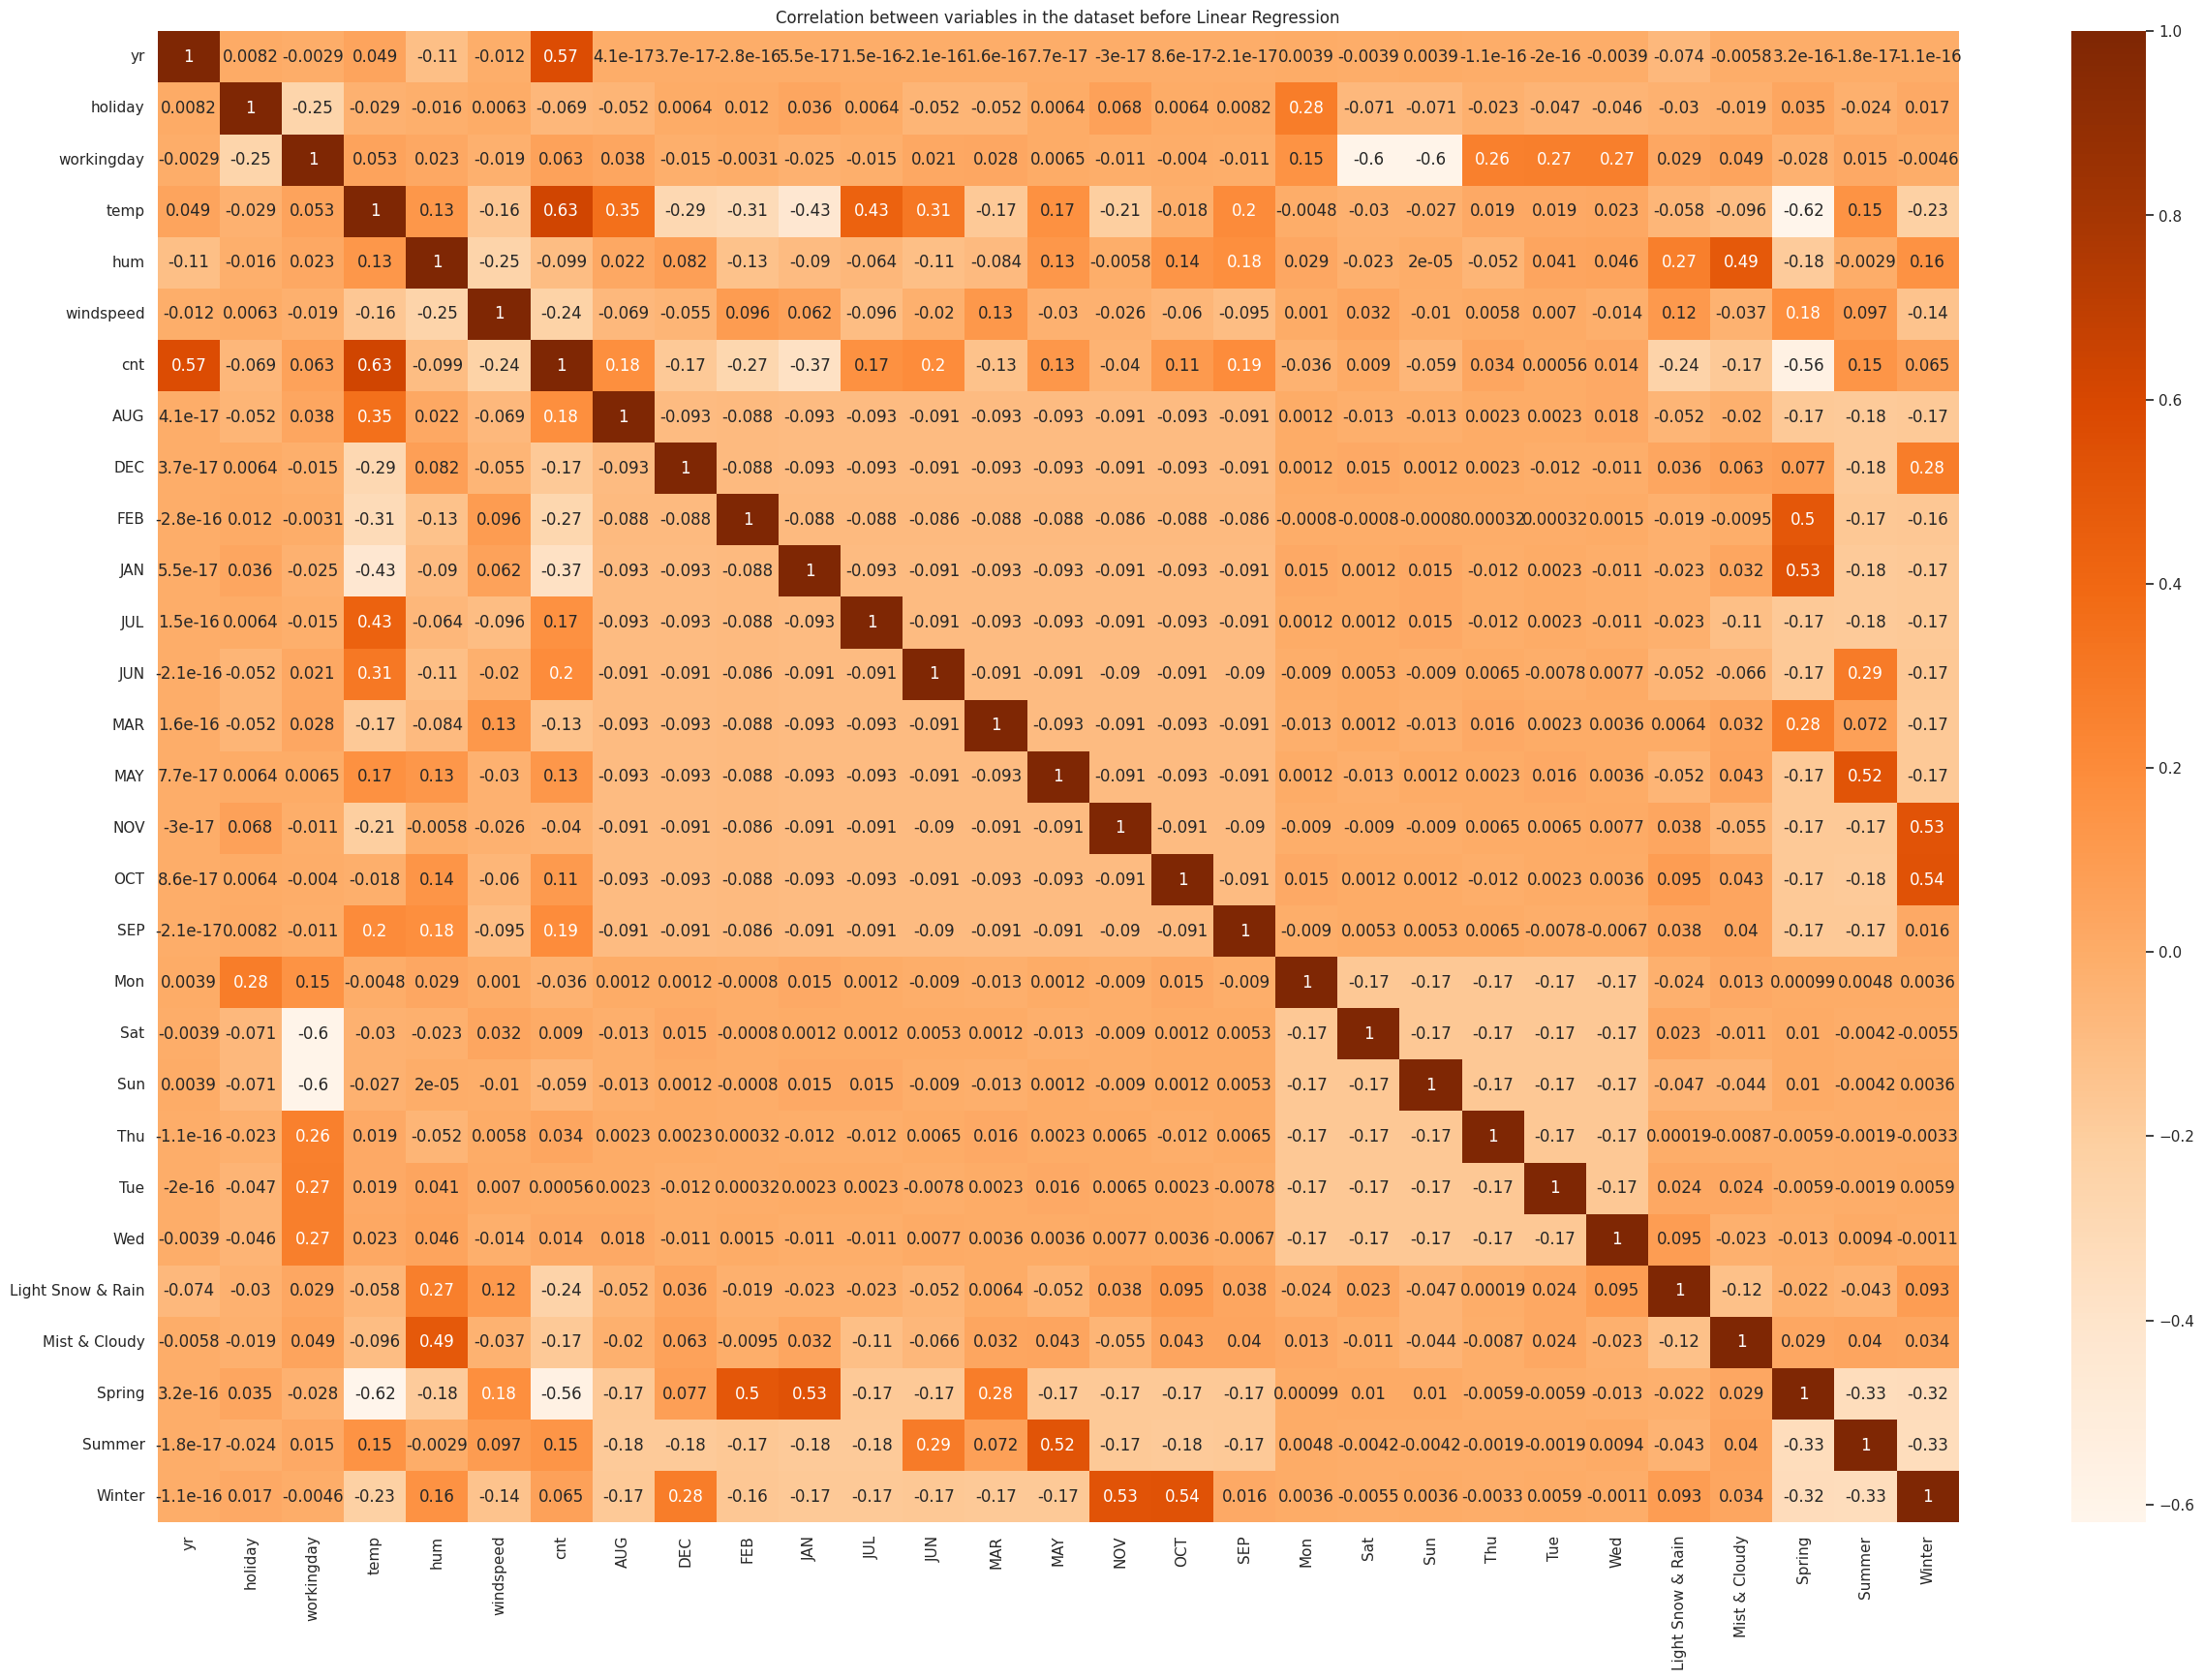

In [31]:
# Making a heatmap to showcase correlation between the new variables
plt.figure(figsize=(30, 20))
sns.heatmap(boom_bikes.corr(), cmap='Oranges', annot=True)
plt.title("Correlation between variables in the dataset before Linear Regression")
plt.show()

# STEP4: Data Split 70:30 (Train and Test)

In [32]:
# Data Split 70:30 (Train and Test)
bb_train, bb_test = train_test_split(boom_bikes, train_size=0.7, test_size=0.3, random_state=100)

In [33]:
print(bb_train.shape)
print(bb_test.shape)

(510, 29)
(219, 29)


# STEP5: Build Models (Linear Regression) - Multiple Iterations


## Rescaling

In [34]:
bb_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471   20.102429   63.112926   12.831318   
std      0.500429    0.157763    0.468282    7.431169   14.156632    5.291832   
min      0.000000    0.000000    0.000000    2.424346    0.000000    2.834381   
25%      0.000000    0.000000    0.000000   13.606865   52.270825    9.041918   
50%      1.000000    0.000000    1.000000   20.209597   63.437500   12.083182   
75%      1.000000    0.000000    1.000000   26.615847   73.250025   15.750879   
max      1.000000    1.000000    1.000000   35.328347   97.041700   34.000021   

               cnt         AUG         DEC         FEB  ...         Sat  \
count   510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean   4486.382353    0.096078    0.084314    0.066667  ...    0.154902   
std    1952.158739    0.294988    0.278131    0.249689  ...    0.362166   
min      22.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%    3120.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%    4530.000000    0.000000    0.000000    0.000000  ...    0.000000   
75%    5973.500000    0.000000    0.000000    0.000000  ...    0.000000   
max    8714.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Sun         Thu         Tue         Wed  Light Snow & Rain  \
count  510.000000  510.000000  510.000000  510.000000         510.000000   
mean     0.143137    0.133333    0.131373    0.158824           0.029412   
std      0.350557    0.340268    0.338139    0.365870           0.169124   
min      0.000000    0.000000    0.000000    0.000000           0.000000   
25%      0.000000    0.000000    0.000000    0.000000           0.000000   
50%      0.000000    0.000000    0.000000    0.000000           0.000000   
75%      0.000000    0.000000    0.000000    0.000000           0.000000   
max      1.000000    1.000000    1.000000    1.000000           1.000000   

       Mist & Cloudy      Spring      Summer     Winter  
count     510.000000  510.000000  510.000000  510.00000  
mean        0.343137    0.243137    0.245098    0.24902  
std         0.475223    0.429398    0.430568    0.43287  
min         0.000000    0.000000    0.000000    0.00000  
25%         0.000000    0.000000    0.000000    0.00000  
50%         0.000000    0.000000    0.000000    0.00000  
75%         1.000000    0.000000    0.000000    0.00000  
max         1.000000    1.000000    1.000000    1.00000  

[8 rows x 29 columns]

In [35]:
# Create a list of variables (numerical) that require scaling
num_vars_to_scale = ["temp", "windspeed","hum", "cnt"]

# Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
bb_train[num_vars_to_scale] = scaler.fit_transform(bb_train[num_vars_to_scale])

In [36]:
bb_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537262    0.650369    0.320768   
std      0.500429    0.157763    0.468282    0.225844    0.145882    0.169797   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.540519    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.735215    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt         AUG         DEC         FEB  ...         Sat  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.513620    0.096078    0.084314    0.066667  ...    0.154902   
std      0.224593    0.294988    0.278131    0.249689  ...    0.362166   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.356420    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.518638    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.684710    0.000000    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Sun         Thu         Tue         Wed  Light Snow & Rain  \
count  510.000000  510.000000  510.000000  510.000000         510.000000   
mean     0.143137    0.133333    0.131373    0.158824           0.029412   
std      0.350557    0.340268    0.338139    0.365870           0.169124   
min      0.000000    0.000000    0.000000    0.000000           0.000000   
25%      0.000000    0.000000    0.000000    0.000000           0.000000   
50%      0.000000    0.000000    0.000000    0.000000           0.000000   
75%      0.000000    0.000000    0.000000    0.000000           0.000000   
max      1.000000    1.000000    1.000000    1.000000           1.000000   

       Mist & Cloudy      Spring      Summer     Winter  
count     510.000000  510.000000  510.000000  510.00000  
mean        0.343137    0.243137    0.245098    0.24902  
std         0.475223    0.429398    0.430568    0.43287  
min         0.000000    0.000000    0.000000    0.00000  
25%         0.000000    0.000000    0.000000    0.00000  
50%         0.000000    0.000000    0.000000    0.00000  
75%         1.000000    0.000000    0.000000    0.00000  
max         1.000000    1.000000    1.000000    1.00000  

[8 rows x 29 columns]

## Dividing into X and Y sets for the model building

In [37]:
y_train = bb_train.pop('cnt')
X_train = bb_train

In [38]:
print(X_train.shape)
print(y_train.shape)

(510, 28)
(510,)


## Model buidling using RFE

In [39]:
# Use LinearRegresion()

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
# Select number of features to select
rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [41]:
# Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('AUG', False, 6),
 ('DEC', False, 3),
 ('FEB', False, 4),
 ('JAN', True, 1),
 ('JUL', True, 1),
 ('JUN', False, 13),
 ('MAR', False, 14),
 ('MAY', False, 5),
 ('NOV', False, 2),
 ('OCT', False, 10),
 ('SEP', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thu', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 12),
 ('Light Snow & Rain', True, 1),
 ('Mist & Cloudy', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [42]:
# List of columns (features) selected by rfe
selected_cols= X_train.columns[rfe.support_]
print(selected_cols)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'JAN', 'JUL',
       'SEP', 'Sat', 'Light Snow & Rain', 'Mist & Cloudy', 'Spring', 'Summer',
       'Winter'],
      dtype='object')


In [43]:
# List of columns (features) NOT selected by rfe
not_selected_cols = X_train.columns[~ rfe.support_]
print(not_selected_cols)

Index(['AUG', 'DEC', 'FEB', 'JUN', 'MAR', 'MAY', 'NOV', 'OCT', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')


In [44]:
X_train_rfe = X_train[selected_cols]

## Building Model

### Model No 01  

In [45]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1.astype(float)).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          2.31e-191
Time:                        11:38:19   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2510      0.03

### Calculate VIF

In [46]:
print(X_train_rfe.shape)

(510, 15)


In [47]:
vif = pd.DataFrame()
vif['Features']= X_train_rfe.columns
vif['VIF']= [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

Features    VIF
4                 hum  29.40
3                temp  17.77
2          workingday   5.31
5           windspeed   4.73
12             Spring   4.53
14             Winter   3.48
13             Summer   2.84
11      Mist & Cloudy   2.29
0                  yr   2.09
9                 Sat   1.98
6                 JAN   1.67
7                 JUL   1.59
8                 SEP   1.39
10  Light Snow & Rain   1.25
1             holiday   1.18

```
Analysing Model 1
1. High VIF and High p-value: There are no features with high VIF and high p-value
2. High VIF and Low p-value: humidity (hum) and temperature (temp) have high VIF but very low p-value. Hence, should not be dropped.
3. Low VIF and High p-value: JAN month has high p-value. This feature needs to be dropped.
```

In [48]:
# dropping JAN month feature as it has high p value
X_train_new = X_train_rfe.drop([ 'JAN'] , axis = 1)

## Model No 2 (after iteration and rebuild)








In [49]:
#Calculating VIF
vif = pd.DataFrame()
vif['Features']= X_train_new.columns
vif['VIF']= [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

Features    VIF
4                 hum  28.49
3                temp  16.97
2          workingday   5.28
5           windspeed   4.72
11             Spring   4.24
13             Winter   3.44
12             Summer   2.83
10      Mist & Cloudy   2.28
0                  yr   2.08
8                 Sat   1.97
6                 JUL   1.58
7                 SEP   1.39
9   Light Snow & Rain   1.24
1             holiday   1.17

In [50]:
#Building 2nd model
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          1.13e-191
Time:                        11:38:19   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2394      0.03

```
Analysing Model 2
1. High VIF and High p-value: There are no features with high VIF and high p-value
2. High VIF and Low p-value: humidity (hum) and temperature (temp) have high VIF but very low p-value. Hence, should not be dropped.
3. Low VIF and High p-value: holiday has high p-value. This feature needs to be dropped.
```

In [51]:
# Dropping holiday feature as it has high p-value
X_train_new2= X_train_new.drop([ 'holiday'] , axis = 1)

## Model 3 - (After iteration and rebuild)

In [52]:
vif = pd.DataFrame()
vif['Features']= X_train_new2.columns
vif['VIF']= [variance_inflation_factor(X_train_new2.values,i) for i in range(X_train_new2.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

Features    VIF
3                 hum  28.41
2                temp  16.87
1          workingday   4.71
4           windspeed   4.70
10             Spring   4.18
12             Winter   3.40
11             Summer   2.83
9       Mist & Cloudy   2.28
0                  yr   2.08
7                 Sat   1.84
5                 JUL   1.58
6                 SEP   1.38
8   Light Snow & Rain   1.24

In [53]:
X_train_lm_3 = sm.add_constant(X_train_new2)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          8.51e-192
Time:                        11:38:19   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2298      0.03


```
Analysing Model 3
1. High VIF and High p-value: There are no features with high VIF and high p-value
2. Low VIF and High p-value: There are no features.
2. High VIF and Low p-value: humidity (hum) and temperature (temp) have high VIF but very low p-value. humidity (hum) can be dropped now.
```

In [54]:
# Dropping hum (humidity) feature because it has very high VIF
X_train_new3= X_train_new2.drop(['hum'], axis = 1)

## Model 4 - (After iteration and rebuild)

In [55]:
vif = pd.DataFrame()
vif['Features']= X_train_new3.columns
vif['VIF']= [variance_inflation_factor(X_train_new3.values,i) for i in range(X_train_new3.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

Features   VIF
2                temp  6.73
1          workingday  4.65
3           windspeed  4.64
9              Spring  2.38
10             Summer  2.31
0                  yr  2.07
11             Winter  1.92
6                 Sat  1.83
4                 JUL  1.58
8       Mist & Cloudy  1.56
5                 SEP  1.34
7   Light Snow & Rain  1.08

In [56]:
X_train_lm_4 = sm.add_constant(X_train_new3)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          3.28e-189
Time:                        11:38:19   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1493      0.03

#### Model Acceptance
* Now that VIF which is acceptable (though slightly high)
* p-value for all the features is less than 0.05
* R-squared is 0.840

Note:
* We will go with this model as our final model as it has all important statistics like high (R-square, Adjusted R-squared and F-statistic).
* Also it shows no insignificant variables and no multicollinearty (high VIF) variables.
* The difference between R-square and Adjusted R-square is 0.063 which shows that no further variables are required to be removed from this model.

In [57]:
lr_4.params

const                0.149280
yr                   0.233807
workingday           0.054735
temp                 0.492470
windspeed           -0.149998
JUL                 -0.048914
SEP                  0.073841
Sat                  0.066577
Light Snow & Rain   -0.289240
Mist & Cloudy       -0.082998
Spring              -0.066220
Summer               0.046893
Winter               0.085092
dtype: float64

# STEP6: Residual Analysis of the train data and validation

In [58]:
X_train_lm_4

const  yr  workingday      temp  windspeed  JUL  SEP  Sat  \
653    1.0   1           1  0.509887   0.300794    0    0    0   
576    1.0   1           1  0.815169   0.264686    1    0    0   
426    1.0   1           0  0.442393   0.255342    0    0    1   
728    1.0   1           0  0.245101   0.663106    0    0    0   
482    1.0   1           0  0.395666   0.188475    0    0    1   
..     ...  ..         ...       ...        ...  ...  ...  ...   
526    1.0   1           1  0.824514   0.355596    0    0    0   
578    1.0   1           1  0.863973   0.187140    0    0    0   
53     1.0   0           1  0.202618   0.111379    0    0    0   
350    1.0   0           0  0.248216   0.431816    0    0    1   
79     1.0   0           1  0.462664   0.529881    0    0    0   

     Light Snow & Rain  Mist & Cloudy  Spring  Summer  Winter  
653                  0              0       0       0       1  
576                  0              0       0       0       0  
426                  0              1       1       0       0  
728                  0              0       1       0       0  
482                  0              1       0       1       0  
..                 ...            ...     ...     ...     ...  
526                  0              1       0       1       0  
578                  0              0       0       0       0  
53                   0              0       1       0       0  
350                  0              1       0       0       1  
79                   0              1       0       1       0  

[510 rows x 13 columns]

In [59]:
y_train_pred = lr_4.predict(X_train_lm_4)

### Normality of Error Terms

Text(0.5, 0, 'Residual Errors')

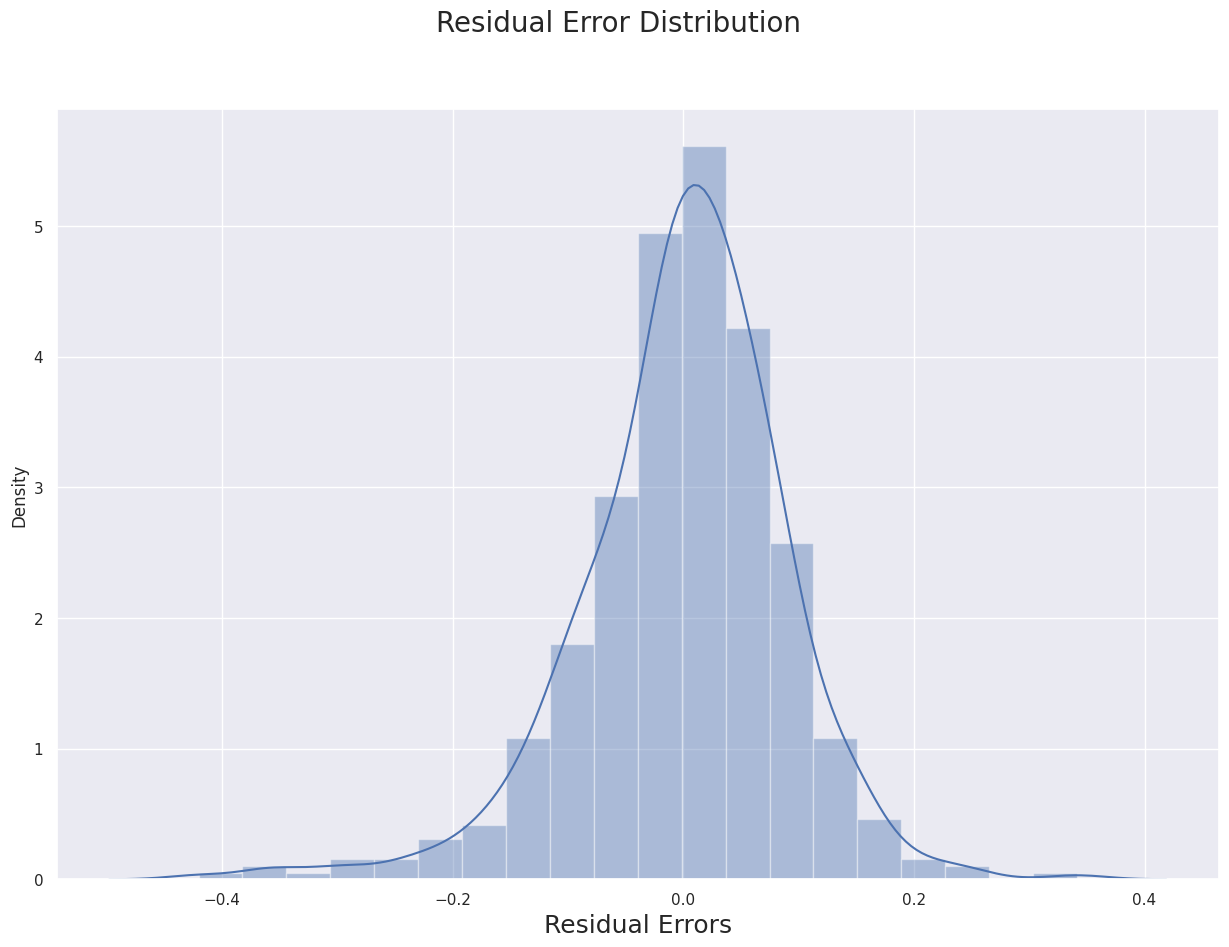

In [60]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Residual Error Distribution', fontsize = 20)
plt.xlabel('Residual Errors', fontsize = 18)

### Error terms are normally distributed

### Making Predictions Using the Final Model

In [61]:
from sklearn.metrics import r2_score


In [62]:
#Print R-squared Value
r2_score(y_train,y_train_pred)


0.8403791005951211

# STEP7: Prediction of values on test dataset

#### Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model that we got.

### Applying the scaling on the test sets

In [63]:
num_vars = ["temp", "windspeed", "hum", "cnt"]

bb_test[num_vars] = scaler.transform(bb_test[num_vars])

In [64]:
bb_test.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.698630    0.558941    0.638508    0.313350   
std      0.500722    0.188034    0.459904    0.233698    0.148974    0.159947   
min      0.000000    0.000000    0.000000    0.046591    0.261915   -0.042808   
25%      0.000000    0.000000    0.000000    0.354650    0.527265    0.198517   
50%      0.000000    0.000000    1.000000    0.558691    0.627737    0.299459   
75%      1.000000    0.000000    1.000000    0.759096    0.743928    0.403048   
max      1.000000    1.000000    1.000000    0.984424    1.002146    0.807474   

              cnt         AUG         DEC         FEB  ...         Sat  \
count  219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean     0.520592    0.059361    0.086758    0.100457  ...    0.118721   
std      0.218435    0.236840    0.282125    0.301297  ...    0.324202   
min      0.048205    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.377531    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.524275    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.672745    0.000000    0.000000    0.000000  ...    0.000000   
max      0.963300    1.000000    1.000000    1.000000  ...    1.000000   

              Sun         Thu         Tue         Wed  Light Snow & Rain  \
count  219.000000  219.000000  219.000000  219.000000         219.000000   
mean     0.146119    0.164384    0.164384    0.100457           0.027397   
std      0.354034    0.371472    0.371472    0.301297           0.163612   
min      0.000000    0.000000    0.000000    0.000000           0.000000   
25%      0.000000    0.000000    0.000000    0.000000           0.000000   
50%      0.000000    0.000000    0.000000    0.000000           0.000000   
75%      0.000000    0.000000    0.000000    0.000000           0.000000   
max      1.000000    1.000000    1.000000    1.000000           1.000000   

       Mist & Cloudy      Spring      Summer      Winter  
count     219.000000  219.000000  219.000000  219.000000  
mean        0.319635    0.255708    0.264840    0.232877  
std         0.467403    0.437258    0.442259    0.423633  
min         0.000000    0.000000    0.000000    0.000000  
25%         0.000000    0.000000    0.000000    0.000000  
50%         0.000000    0.000000    0.000000    0.000000  
75%         1.000000    1.000000    1.000000    0.000000  
max         1.000000    1.000000    1.000000    1.000000  

[8 rows x 29 columns]

## Dividing into X_test and y_test

In [65]:
y_test = bb_test.pop('cnt')
X_test = bb_test

In [66]:
col1 = X_train_new3.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)

In [67]:
X_test_sm.head()

const  yr  workingday      temp  windspeed  JUL  SEP  Sat  \
184    1.0   0           0  0.831783   0.084219    1    0    0   
535    1.0   1           1  0.901354   0.153728    0    0    0   
299    1.0   0           1  0.511964   0.334206    0    0    0   
221    1.0   0           1  0.881625   0.339570    0    0    0   
152    1.0   0           1  0.817246   0.537414    0    0    0   

     Light Snow & Rain  Mist & Cloudy  Spring  Summer  Winter  
184                  0              1       0       0       0  
535                  0              0       0       1       0  
299                  0              1       0       0       1  
221                  0              0       0       0       0  
152                  0              0       0       1       0

In [68]:
y_pred = lr_4.predict(X_test_sm)

### Calculating the R-squared
R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [69]:
from sklearn.metrics import r2_score
print('R2_score of Train dataset', r2_score(y_train, y_train_pred))
print('R2_score of Test dataset', r2_score(y_test, y_pred))

R2_score of Train dataset 0.8403791005951211
R2_score of Test dataset 0.8078366191055724


### Inference:
We can see that the r_squared on the test set is 0.84 and the r-squared on the trained set 0.807 which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

# STEP 8: Model Evaluation

Text(0, 0.5, 'y_pred')

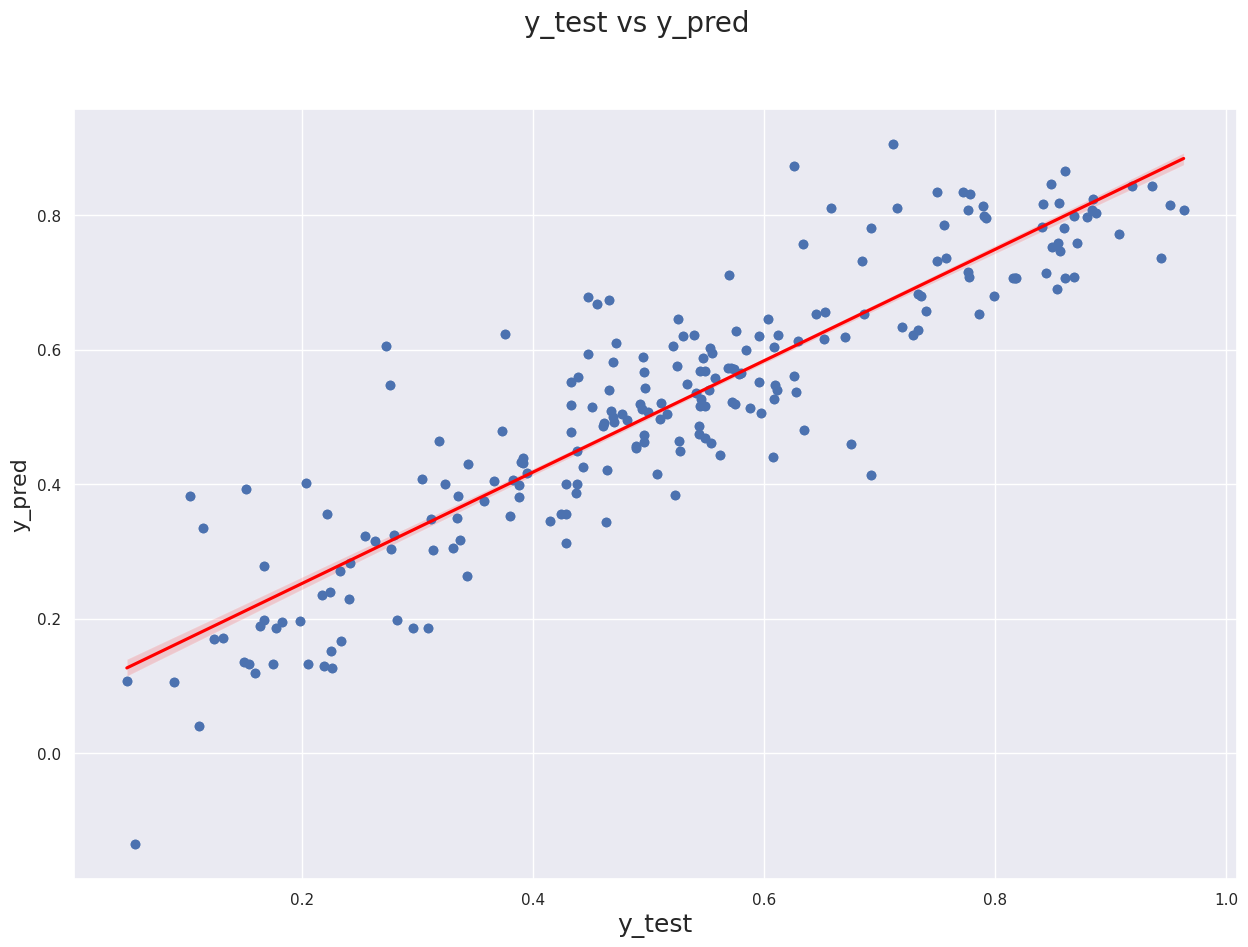

In [70]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

# Getting the variable names and the coefficient values for the final equation of the best fitted line

In [71]:
param = pd.DataFrame(lr_4.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,13))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

Variables  Coefficient value
index                                      
3                   temp           0.492470
1                     yr           0.233807
0                  const           0.149280
12                Winter           0.085092
6                    SEP           0.073841
7                    Sat           0.066577
2             workingday           0.054735
11                Summer           0.046893
5                    JUL          -0.048914
10                Spring          -0.066220
9          Mist & Cloudy          -0.082998
4              windspeed          -0.149998
8      Light Snow & Rain          -0.289240

# STEP 9: Final conclusion

#### By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

#### cnt = 0.149 + (0.492 x temp) + (0.233 x yr) + (0.085 x Winter) + (0.073 x SEP) + (0.066 x Sat) + (0.054 x workingday) + (0.046 x Summer) - (0.048 x JUL) - (0.066 x Spring) - (0.082 x Mist & Cloudy) - (0.149 x windspeed) - (0.289 x Light Snow & Rain)


* All the positive coefficients like temp, Summer indicate that an increase in these values will lead to an increase in the value of cnt.
* All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.
* From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 80% of bike demand.


#### Hence, it can be clearly concluded that the variables temperature , season/ weather situation and month/year are significant in predicting the demand for shared bikes .

# STEP 10: Boom Bikes - Final Recommendations:

- Focus on Season and months
- Season - Summer with specific months May to SEP for HIGHER demands.
- Statistically with an increase in temperature the demand also increases, hence it should keep track of the weather conditions.
- During the Winter season the demand rises, hence it should be well prepared to meet the high demand.
- Holiday time seems to be LOW demand for biking.